## FDA - drug reactions data
In this excersice, intead of using the API I just simply download a file from the FDA download page [FDA download page](https://open.fda.gov/data/downloads/). Specifically the file **drug-event-0035-of-0035.json** refers to 2021 Q4 (part 35 of 35) - 74.89 mb.

### Initial  steps with a json file

In [1]:
import json
import pandas as pd
data = json.load(open('drug-event-0035-of-0035.json'))
print(data.keys())

dict_keys(['meta', 'results'])


In [2]:
# just found this library to check a json structure (or any dictionary really)
from print_schema import print_schema
print_schema(data, indent=3, dense=False)

|- meta	 - <class 'dict'>
   |- disclaimer	 - <class 'str'>
   |- terms	 - <class 'str'>
   |- license	 - <class 'str'>
   |- last_updated	 - <class 'str'>
   |- results	 - <class 'dict'>
      |- skip	 - <class 'int'>
      |- limit	 - <class 'int'>
      |- total	 - <class 'int'>
|- results	 - list [4529] <class 'dict'>
   |- safetyreportversion	 - <class 'str'>
   |- safetyreportid	 - <class 'str'>
   |- primarysourcecountry	 - <class 'str'>
   |- occurcountry	 - <class 'str'>
   |- transmissiondateformat	 - <class 'str'>
   |- transmissiondate	 - <class 'str'>
   |- reporttype	 - <class 'str'>
   |- serious	 - <class 'str'>
   |- seriousnessdeath	 - <class 'str'>
   |- seriousnesslifethreatening	 - <class 'str'>
   |- seriousnesshospitalization	 - <class 'str'>
   |- seriousnessdisabling	 - <class 'str'>
   |- seriousnesscongenitalanomali	 - <class 'str'>
   |- seriousnessother	 - <class 'str'>
   |- receivedateformat	 - <class 'str'>
   |- receivedate	 - <class 'str'>
   |- receip

Knowing the structure of the json file saves a lot of exploration. One can simply extract the information we need directly and by doing so we could also be avoiding the double checks on datatypes that we need to do sometimes when importing things into pandas. 


**Note**: I don't know very well this library, but at least for this general json structure info seems to be doing decently. I 

## Are there different adverse effects in different countries?
Let's tackle directly now one of the questions. In this first approach we will some level pof granularity like for instance how many times each reaction is present for each country but we have to start somewhere.

In [3]:
#Number of records
nRecords = len(data["results"])

#List of unique countries
lCountries = []
for i in range (len(data["results"])):
    try:
        lCountries.append(data["results"][i]['primarysourcecountry'])
    except:
        pass
lUniqueCountries = list(set(lCountries))

#initializing a dictionary for each unique country. 
#The list of all the drug reactions will be the values of this dictionary
dictC = {}
for country in lUniqueCountries:
    dictC[country]=[]
    
#Looping over all the records in the json file and populating the dictionary
for i in range(nRecords):
    try:
        country = data["results"][i]['primarysourcecountry']
        dictC[country] = dictC[country] + [element['reactionmeddrapt'] for element in data["results"][i]["patient"]["reaction"]]
    except:
        pass
#example of entry in the dictionary
dictC['GB']

['Tubulointerstitial nephritis',
 'Adverse drug reaction',
 'Hepatic necrosis',
 'Brain oedema',
 'Coagulopathy',
 'Acute hepatic failure',
 'Jaundice',
 'Drug interaction',
 'Liver function test abnormal',
 'Medication error',
 'Accidental overdose',
 'Dyspnoea',
 'COVID-19 pneumonia',
 'Disease progression',
 'Breast cancer',
 'Pyrexia',
 'Abdominal pain',
 'Pyrexia',
 'Off label use',
 'Euglycaemic diabetic ketoacidosis',
 'Lactic acidosis',
 'Acute kidney injury',
 'Vomiting',
 'Snoring',
 'Chest discomfort',
 'Dry mouth',
 'Anxiety',
 'Palpitations',
 'Hypersensitivity',
 'Pruritus',
 'Pain',
 'Rash',
 'Drug eruption',
 'Lip swelling',
 'Lung neoplasm malignant',
 'Metastatic neoplasm',
 'Chest pain',
 'Pleural effusion',
 'Iron deficiency anaemia',
 'Delirium',
 'Hypothyroidism',
 'Condition aggravated',
 'Schizophrenia',
 'Cellulitis',
 'Angina pectoris',
 'Vitamin D deficiency',
 'Haemorrhoids',
 'Dermatitis atopic',
 'Anxiety disorder',
 'Chronic obstructive pulmonary disease'

In [4]:
### Visualizing the number of unique reactions per country
# Creating a Deep Copy of a Dictionary in Python
from copy import deepcopy
dictD = deepcopy(dictC)
#replacing the lists with the number of unique elements in the list
for keys in dictD:
    dictD[keys] = len(set(dictD[keys]))
print(dictD)    

{'CL': 25, 'NL': 160, 'PE': 17, 'JP': 355, 'FR': 408, 'CZ': 100, 'US': 1756, 'EG': 74, 'PY': 1, 'FI': 44, 'IT': 187, 'PA': 33, 'AF': 1, 'QA': 1, 'BE': 10, 'KE': 8, 'ES': 164, 'PT': 102, 'RO': 51, 'SE': 49, 'TR': 14, 'NG': 10, 'NO': 15, 'PL': 113, 'ZA': 8, 'HK': 7, 'CO': 140, 'BR': 206, 'MA': 7, 'LT': 3, 'CH': 63, 'AU': 111, 'GR': 13, 'GB': 450, 'NP': 1, 'PH': 3, 'GT': 11, 'SK': 4, 'IE': 52, 'AT': 110, 'PR': 3, 'MX': 30, 'BH': 5, 'IL': 27, 'TW': 13, 'MY': 4, 'NI': 3, 'DK': 30, 'BA': 5, 'RU': 10, 'SG': 9, 'DE': 425, 'LB': 5, 'BG': 1, 'IN': 54, 'UA': 7, 'CA': 1183, 'GD': 2, 'SA': 7, 'CR': 25, 'DO': 10, 'HR': 48, 'CN': 76, 'HU': 24, 'KW': 3, 'PK': 5, 'AR': 65, 'SI': 25, 'IR': 15, 'OM': 3, 'AE': 3, 'KR': 58, 'ID': 10, 'UG': 12}


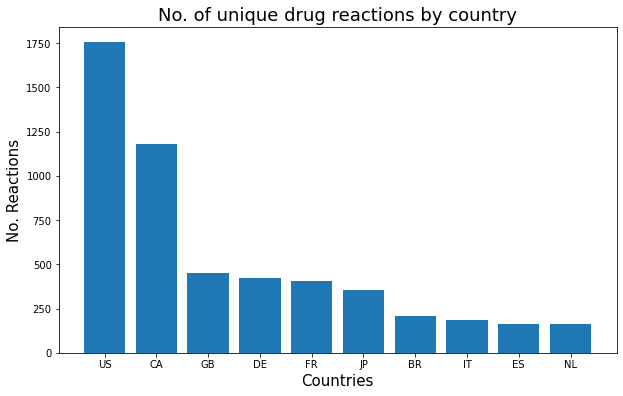

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
#Visualizing the first N countries (orderred by No. of reactions)
# creating the df for ploting
N = 10
countries  = list(dictD.keys())
nReactions = list(dictD.values())
zipped = list(zip(countries, nReactions))
df = pd.DataFrame(zipped, columns=['Countries', 'No. Reactions'])
df_sorted_desc= df.sort_values('No. Reactions',ascending=False)
df2plot = df_sorted_desc.head(N)

# ploting
plt.figure(figsize=(10,6))
plt.bar('Countries', 'No. Reactions',data=df2plot)
plt.xlabel("Countries", size=15)
plt.ylabel("No. Reactions", size=15)
plt.title("No. of unique drug reactions by country", size=18)
plt.show()

## Final thoughts
The answer to the question in the previous section is simple: **yes**, there are different drug reactions per country. However there are several ways to improve on this, maybe the obvious ones are:
* Analyze other levels of granularity (e.g., quantifying specific drug reactions).
* Extending the analysis to historical data (this is just a snapshot for 2021 Q4).
* Adding new datasets (e.g., demographics).

Hopefully at some point we could have enough to get some really meaninful insights about the question we wanted to answer (patterns? causes?). Maybe then we could even go for other approaches (modelling? forecasting?).  

